# Домашнее задание <a class='anchor' id='hw'>

In [14]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

import matplotlib.pyplot as plt

### 1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [15]:
X, y = load_digits(return_X_y=True)

In [19]:
def to_one_hot(Y):
    
    n_col = np.argmax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    
    return binarized

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [20]:
y = y.flatten()
y = to_one_hot(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
len(X_train[0])

64

In [30]:
len(y[0])

10

In [43]:
def train_neuro_network(X_train, y_train, hidden_neuron_num=5, num_epoch=100, learning_rate=1e-1):

    np.random.seed(1)
    w0 = np.random.random((len(X_train[0]), hidden_neuron_num))
    w1 = np.random.random((hidden_neuron_num, len(y[0])))

    errors = []
    metrics = []

    for i in range(num_epoch):

        layer0 = X_train
        layer1 = sigmoid(layer0 @ w0)
        layer2 = sigmoid(layer1 @ w1)

        layer2_error = layer2 - y_train
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad @ w1.T
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T @ layer2_grad * learning_rate
        w0 -= layer0.T @ layer1_grad * learning_rate

        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
    
    return errors, metrics

In [44]:
def show_errors_metrics_plots(errors, metrics):
    plt.figure(figsize=(16, 5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()

    plt.figure(figsize=(16, 5))
    plt.plot(metrics)
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')
    plt.show()

<ipython-input-33-51cb8a72ded7>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


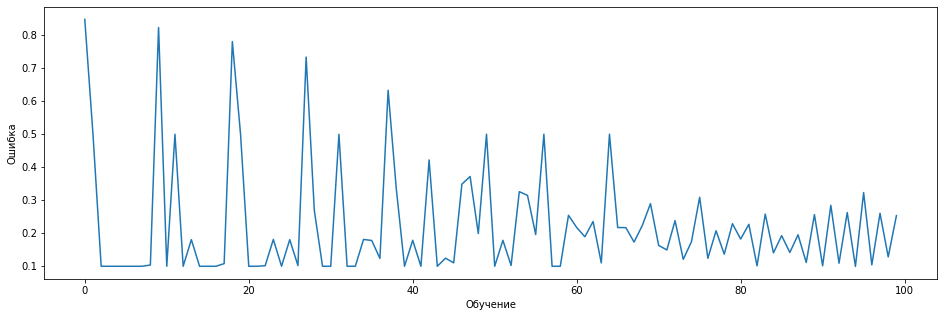

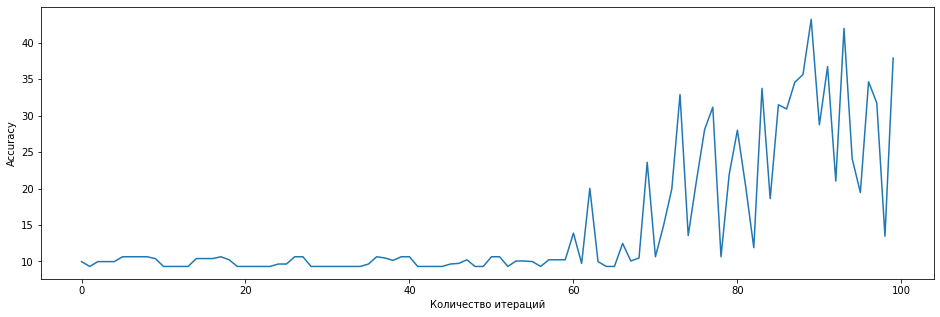

In [45]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=5, num_epoch=100, learning_rate=1e-1)
show_errors_metrics_plots(errors, metrics)

### 2. Проведите анализ — что приводит к ухудшению точности нейронной сети?

<ipython-input-33-51cb8a72ded7>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


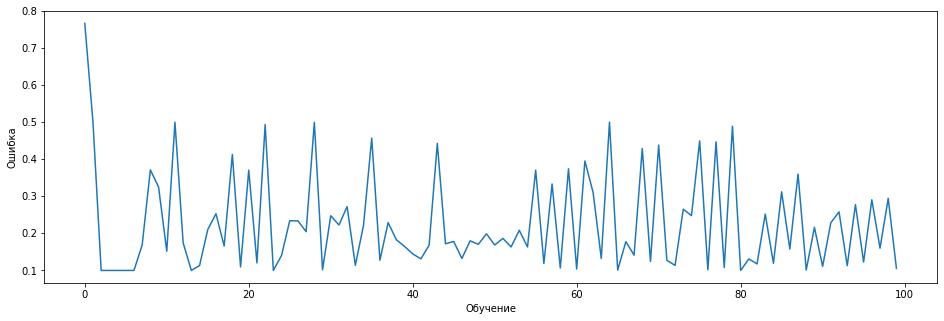

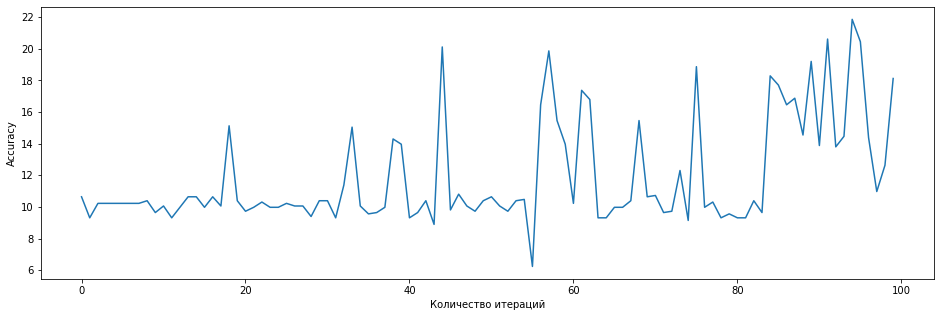

In [46]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=3, num_epoch=100, learning_rate=1e-1)
show_errors_metrics_plots(errors, metrics)

<ipython-input-33-51cb8a72ded7>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


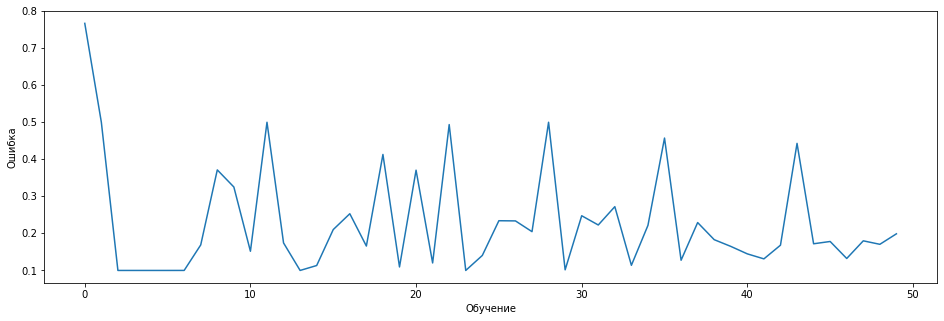

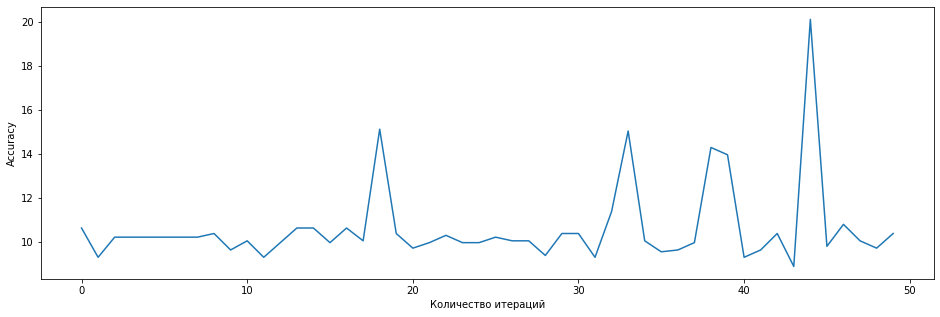

In [47]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=3, num_epoch=50, learning_rate=1e-1)
show_errors_metrics_plots(errors, metrics)

### 3. Что приводит к увеличению ее точности?

<ipython-input-33-51cb8a72ded7>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


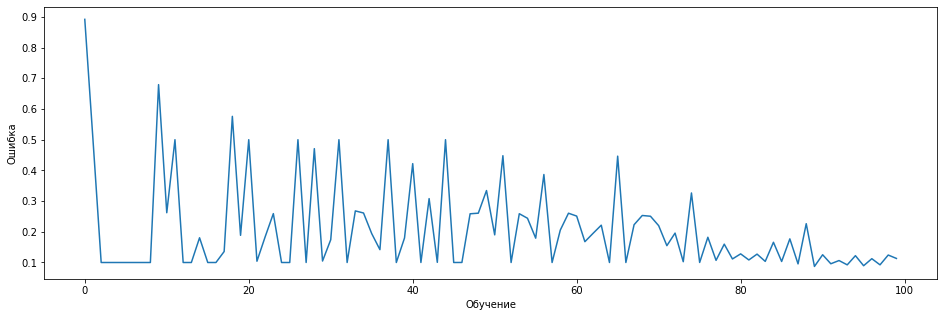

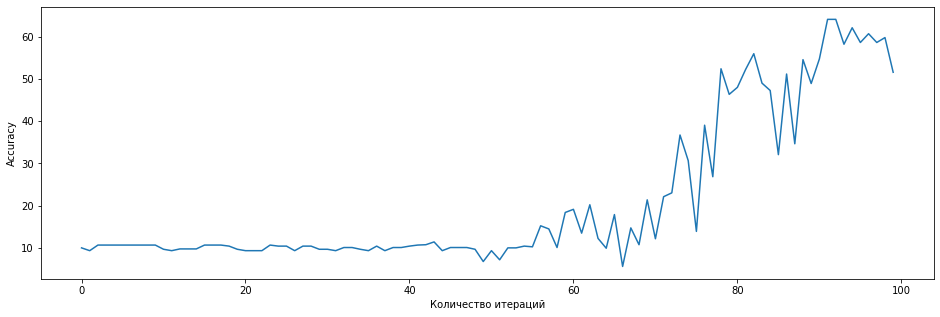

In [51]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=10, num_epoch=100, learning_rate=1e-1)
show_errors_metrics_plots(errors, metrics)

<ipython-input-33-51cb8a72ded7>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


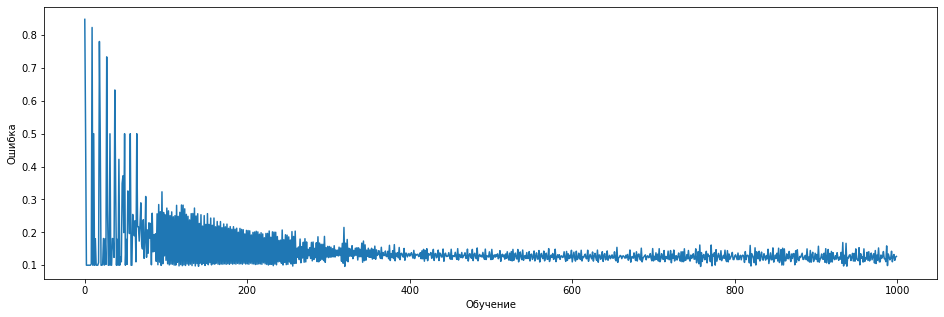

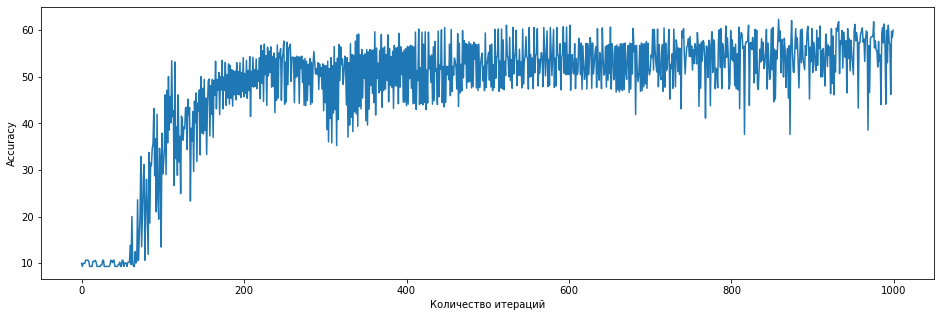

In [52]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=5, num_epoch=1000, learning_rate=1e-1)
show_errors_metrics_plots(errors, metrics)

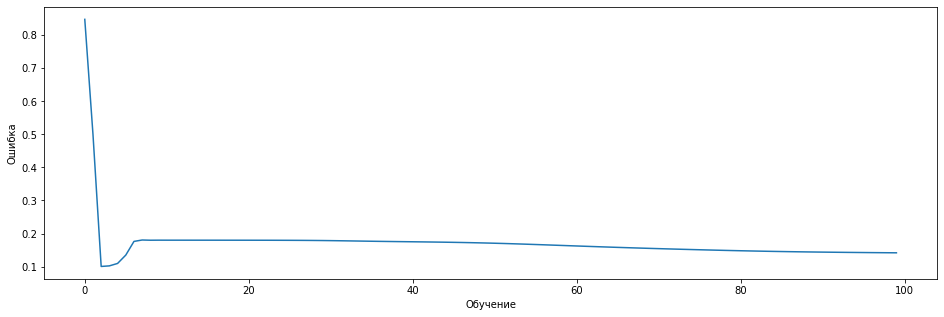

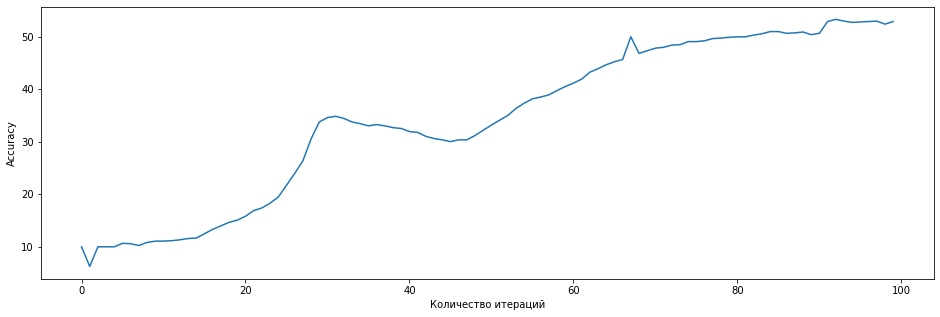

In [53]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=5, num_epoch=100, learning_rate=1e-2)
show_errors_metrics_plots(errors, metrics)

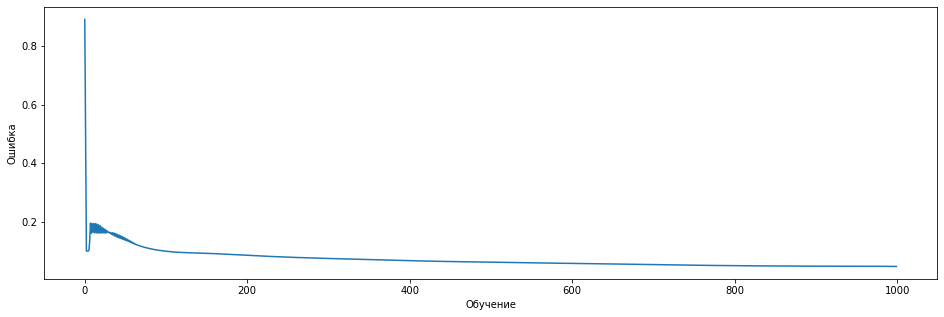

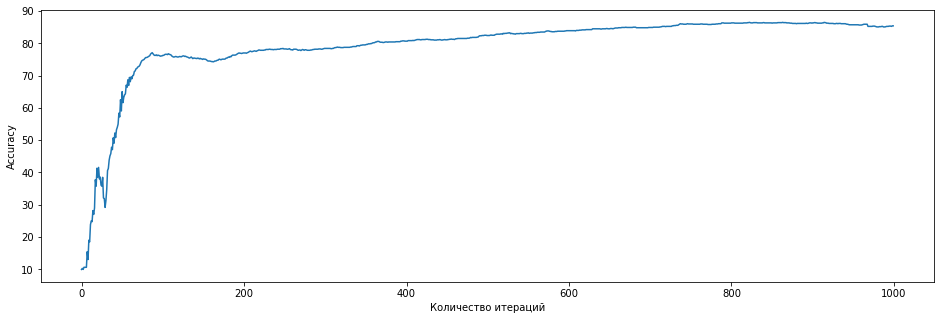

In [54]:
errors, metrics = train_neuro_network(X_train, y_train, hidden_neuron_num=10, num_epoch=1000, learning_rate=1e-2)
show_errors_metrics_plots(errors, metrics)

#### Вывод:  
Поэтаное уменьшение(увеличение) гиперпараметров показывает, что количество эпох и нейронов скрытого слоя довольно сильно влияют на ошибку и Accuracy в соответсвующем направлении. А скорость обучения больше влияет на некую зашумленность функции ошибки и Accuracy, чем он меньше тем более гладкими получаются функции